# Organize historic data in easy-to-understand DataFrame

In [255]:
from google.transit import gtfs_realtime_pb2
import numpy as np
import pandas as pd
import gzip
import os
import datetime

directory = '../data/30/'
edgeDelaysDict={}
edgeDelaysDF = pd.DataFrame(columns=['ts','delay','stop_id1','stop_id2'])
edgeDelaysNumpy = np.array([[],[],[]])

# Loop through all files in directory
for filename in os.listdir(directory):
    if (filename != '.DS_Store'):
        
        # Uncompress and parse protobuff-file using gtfs_realtime_pb2
        with gzip.open(directory + filename, 'rb') as file:
            response = file.read()
            feed = gtfs_realtime_pb2.FeedMessage()
            feed.ParseFromString(response)
            
            # Loop through each entity (trip) in each feed / file. Every trip contains many stop_time_updates
            for trip in feed.entity:
                
                # Loop through all stop_time_update(s) of currently looped trip
                for i, stop_time_update in enumerate(trip.trip_update.stop_time_update):
                    
                    # Excluding the last stop as it does not have a "departuring edge"
                    if (i<len(trip.trip_update.stop_time_update)-1):
                        
                        # Store contextual metadata for the unique delay data point
                        ts = int(trip.trip_update.stop_time_update[i+1].arrival.time)
                        stop_id1 = trip.trip_update.stop_time_update[i].stop_id
                        stop_id2 = trip.trip_update.stop_time_update[i+1].stop_id
                        key = int(trip.trip_update.stop_time_update[i].stop_id) + int(trip.trip_update.stop_time_update[i+1].stop_id)
                        
                        # Store the delay data point
                        delay = int(trip.trip_update.stop_time_update[i+1].arrival.delay-trip.trip_update.stop_time_update[i].arrival.delay)
                        
                        #edgeDelaysDF.loc[key]=[int(ts),int(delay),int(stop_id1),int(stop_id2)]
                        edgeDelaysNumpy = np.append(edgeDelaysNumpy,[[key],[ts],[delay]],axis=1)
                        #edgeDelaysDict.setdefault((
                            #trip.trip_update.stop_time_update[i].stop_id,
                            #trip.trip_update.stop_time_update[i+1].stop_id),[]).append(
                            #{'delayDiff':trip.trip_update.stop_time_update[i+1].arrival.delay-trip.trip_update.stop_time_update[i].arrival.delay,
                            # 'timestamp':trip.trip_update.stop_time_update[i+1].arrival.time})

KeyboardInterrupt: 

## Present (parts of the) data using pandas

In [209]:
edgeDelaysDF

,ts,delay,stop_id1,stop_id2
90220037931390029022003660600002,1580424310,-81,9022003793139002,9022003660600002
90220037812240029022003781221002,1580425542,2,9022003781224002,9022003781221002
90220037812210029022003781051002,1580425600,15,9022003781221002,9022003781051002
90220037810510029022003781216002,1580425647,-20,9022003781051002,9022003781216002
90220037812160029022003781210001,1580425832,-16,9022003781216002,9022003781210001
...,...,...,...,...
90220037600710019022003760153001,1580424119,-43,9022003760071001,9022003760153001
90220037003170029022003700316002,1580424144,-4,9022003700317002,9022003700316002
90220037050210019022003705024002,1580424180,21,9022003705021001,9022003705024002
90220037810510019022003781221001,1580424132,8,9022003781051001,9022003781221001


## Scatter plot the data using matplotlib & numpy

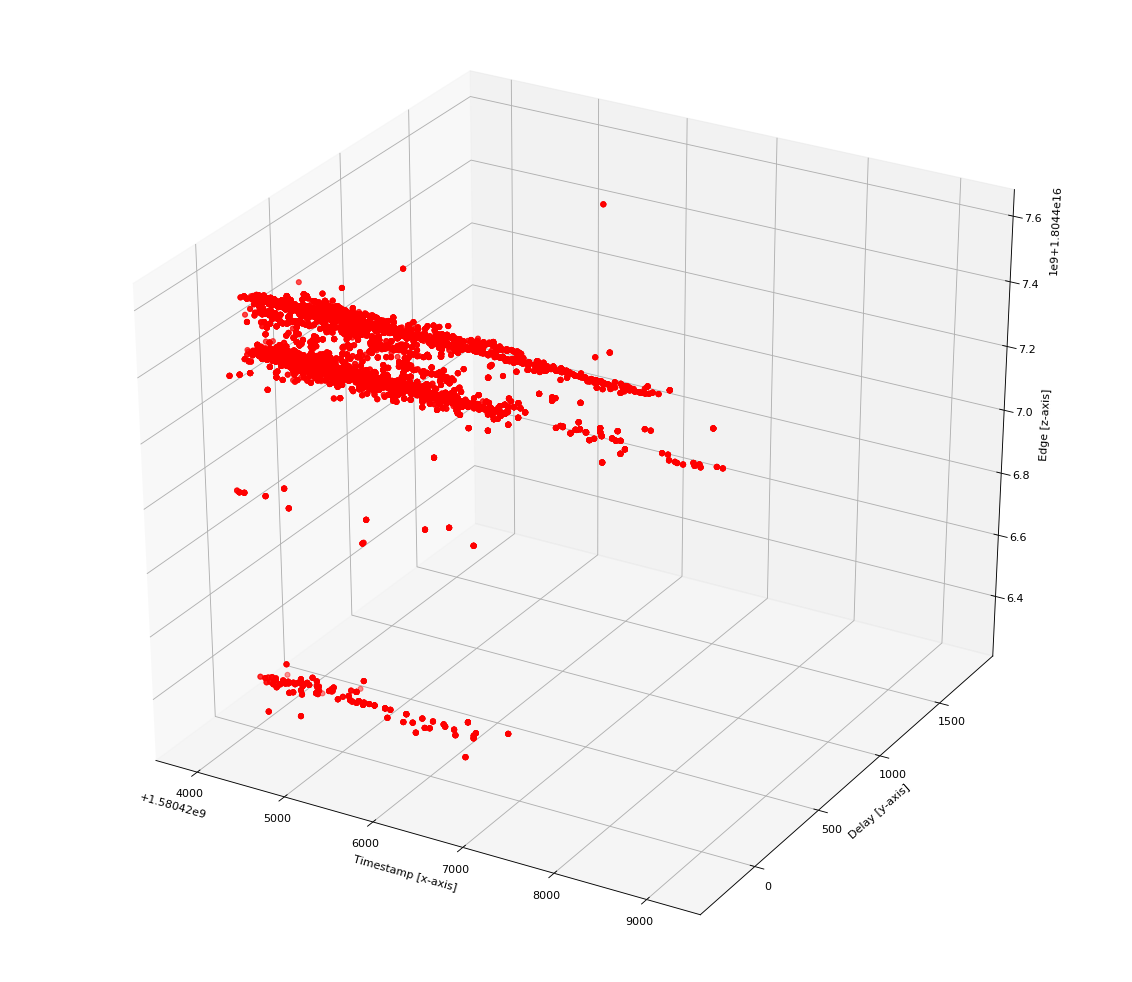

In [247]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111,projection='3d')
ax.scatter(edgeDelaysNumpy[1,:],edgeDelaysNumpy[2,:],edgeDelaysNumpy[0,:],c='red')
ax.set_xlabel('Timestamp [x-axis]')
ax.set_ylabel('Delay [y-axis]')
ax.set_zlabel('Edge [z-axis]')

plt.savefig("demo.png")

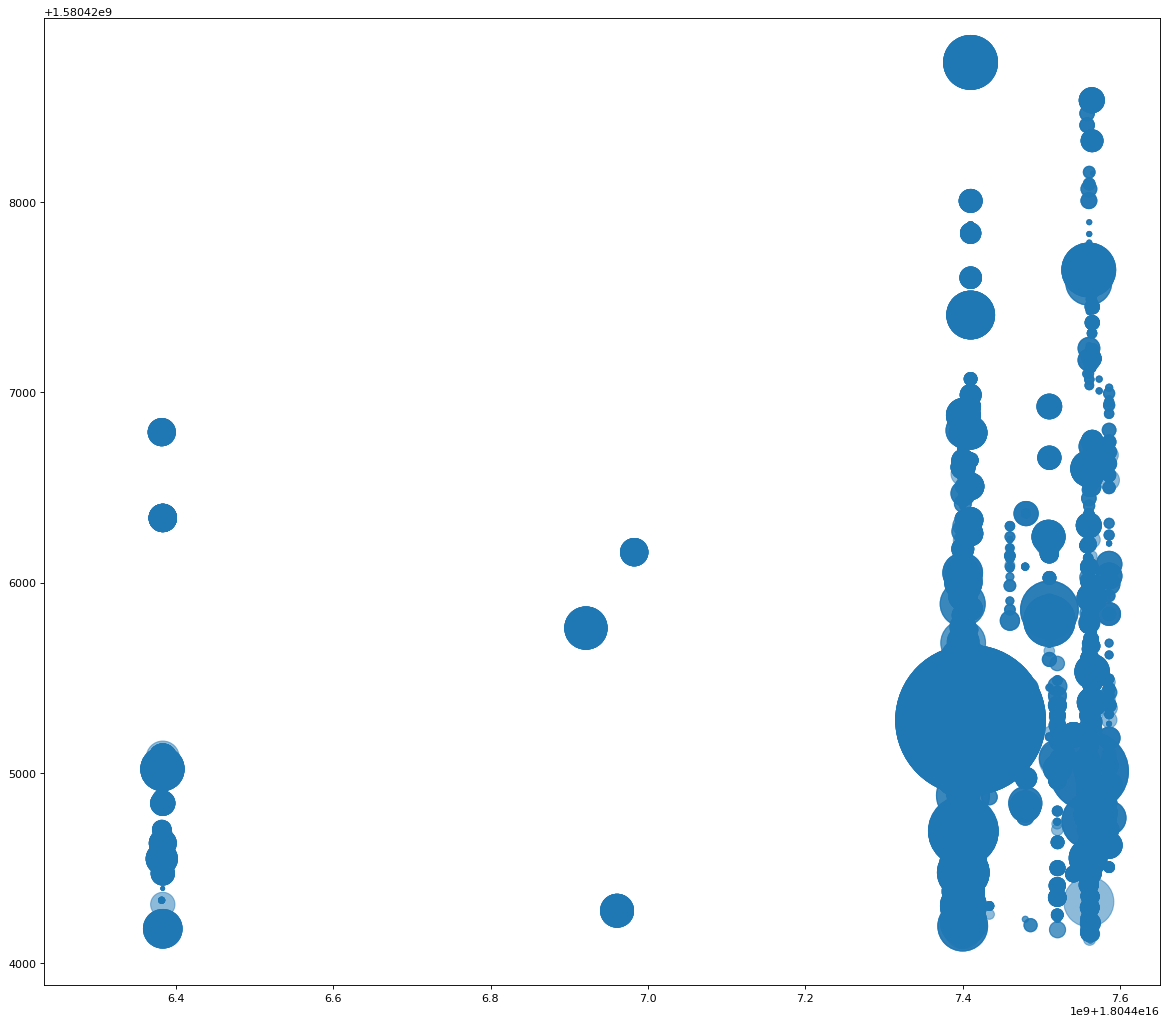

In [254]:
fig = plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

x = edgeDelaysNumpy[0,:] # Different edgeID's
y = edgeDelaysNumpy[1,:] # Timestamp

area = (edgeDelaysNumpy[2,:])*10  # Radius according to delay

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()